In [4]:
import pandas as pd
import numpy as np

In [6]:
car = pd.read_csv('/content/drive/MyDrive/Machine Learning/datasets/quikr_car.csv')

In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [4]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [8]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

In [ ]:
## Quality
"""
1) year has many non- year values
2) year obj to int
3) price values fix
4) fuel type has nan values
5) fuel type one hot encoding
6) kms_driven has kms with int
7) kms_driven obj to int
8) kms_driven has nan values
9) keep first 3 words
10 company one hot encoding
11 final cleaned data
12) name be converted to category by keeping first 3 words
"""


In [7]:
backup = car.copy()

In [13]:
# year has many non- year values
car = car[car['year'].str.isnumeric()]

In [14]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    object
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 46.0+ KB


In [12]:
car['year'].value_counts()
car['year'].str.isnumeric().sum()

842

In [16]:
## year object to int
car['year'] = car['year'].astype(int)

In [21]:
# price values fix
car['Price'].value_counts()

,count
Price,
250000,16
350000,12
400000,11
180000,11
130000,11
...,...
749999,1
1130000,1
1074999,1


In [18]:
## excluding entries with ask for price

car = car[car['Price'] != 'Ask For Price']

In [20]:
# converting car prices to integer
car['Price'] = car['Price'].str.replace(',','').astype(int)

In [25]:
# kms_driven has kms with int
car['kms_driven'].unique()

array(['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms',
       '25,000 kms', '24,530 kms', '60,000 kms', '30,000 kms',
       '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms',
       '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms',
       '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms',
       '82,000 kms', '20,000 kms', '68,000 kms', '38,000 kms',
       '27,000 kms', '33,000 kms', '46,000 kms', '16,000 kms',
       '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms',
       '29,685 kms', '1,30,000 kms', '19,000 kms', '54,000 kms',
       '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms',
       '13,500 kms', '3,600 kms', '45,863 kms', '60,500 kms',
       '12,500 kms', '18,000 kms', '13,349 kms', '29,000 kms',
       '44,000 kms', '42,000 kms', '14,000 kms', '49,000 kms',
       '36,200 kms', '51,000 kms', '1,04,000 kms', '33,333 kms',
       '33,600 kms', '5,600 kms', '7,500 km

In [31]:
car['kms_driven'] = car['kms_driven'].str.split().str.get(0).str.replace(',','')

In [33]:
# filtering out petrol values
car = car[car['kms_driven'].str.isnumeric()]

In [34]:
car['kms_driven'] = car['kms_driven'].astype(int)

In [35]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [37]:
car = car[~car['fuel_type'].isna()]

In [38]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.6+ KB


In [42]:
# first 3 values of name

car['name'] = car['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [44]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [47]:
# reset indexes
car = car.reset_index(drop=True)

In [48]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [49]:
## removing outlier -- removing car with Price greater than 60L
car = car[car['Price']<6e6].reset_index(drop=True)

In [50]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        815 non-null    object
 1   company     815 non-null    object
 2   year        815 non-null    int64 
 3   Price       815 non-null    int64 
 4   kms_driven  815 non-null    int64 
 5   fuel_type   815 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.3+ KB


In [51]:
car.to_csv('/content/drive/MyDrive/Machine Learning/datasets/quikr_car_cleaned.csv')

In [5]:
## reimport

car = pd.read_csv('/content/drive/MyDrive/Machine Learning/datasets/quikr_car_cleaned.csv')

In [10]:
car.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        815 non-null    object
 1   company     815 non-null    object
 2   year        815 non-null    int64 
 3   Price       815 non-null    int64 
 4   kms_driven  815 non-null    int64 
 5   fuel_type   815 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.3+ KB


In [12]:
## MODEL

X = car.drop(columns=['Price'])
y = car['Price']

In [77]:
X.head()

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel


In [2]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
X_train

,name,company,year,kms_driven,fuel_type
606,Mahindra XUV500 W10,Mahindra,2016,41000,Diesel
628,Maruti Suzuki Swift,Maruti,2015,22000,Petrol
78,Mahindra Scorpio VLX,Mahindra,2014,50000,Diesel
330,Mahindra Quanto C8,Mahindra,2013,20000,Diesel
29,Mahindra Scorpio S10,Mahindra,2015,48508,Diesel
...,...,...,...,...,...
119,Hyundai i20 Sportz,Hyundai,2011,33333,Diesel
346,Mahindra Bolero Power,Mahindra,2018,1800,Diesel
214,Toyota Etios,Toyota,2011,36000,Diesel
167,Hyundai Eon Era,Hyundai,2013,27000,Petrol


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder

In [160]:
column_trans = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(handle_unknown='ignore'), ['name', 'company', 'fuel_type']),
], remainder='passthrough')

In [93]:
column_trans.transformers[0][1]

AttributeError: 'OneHotEncoder' object has no attribute 'categories_'

In [161]:
lr = LinearRegression()

In [162]:
pipe1 = make_pipeline(column_trans, lr)

In [163]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [164]:
y_pred = pipe1.predict(X_test)

In [165]:
r2_score(y_test, y_pred)
# ohe -- sparse - (TRUE)

0.5731311949541246

In [112]:
ohe = OneHotEncoder()
ohe.fit(X[['name', 'company', 'fuel_type']])

OneHotEncoder()

In [146]:
column_trans2 = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(categories=ohe.categories_, drop='first'), ['name', 'company', 'fuel_type']),
], remainder='passthrough')

In [147]:
lr2 = LinearRegression()

In [148]:
pipe2 = make_pipeline(column_trans2, lr2)

In [149]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       '...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)],
                                                                drop='first'),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [150]:
y_pred2 = pipe2.predict(X_test)

In [169]:
r2_score(y_test, y_pred2)


-0.4013934074832417

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

<ipython-input-180-2647438b41ad>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['year'])


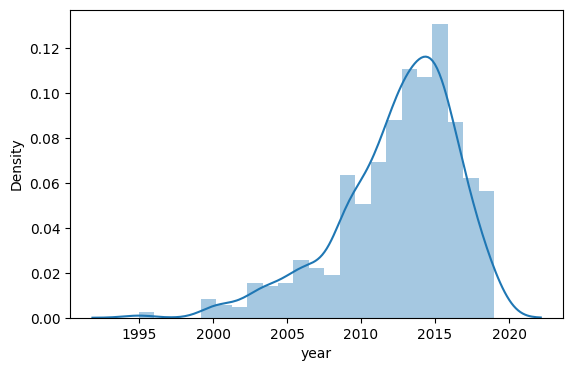

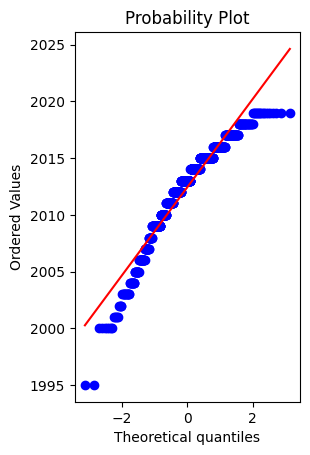

In [180]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X['year'])
plt.show()

plt.subplot(122)
stats.probplot(X['year'], dist='norm', plot=plt)
plt.show()

#left skewed

<ipython-input-175-cc981ad01731>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['kms_driven'])


<Axes: xlabel='kms_driven', ylabel='Density'>

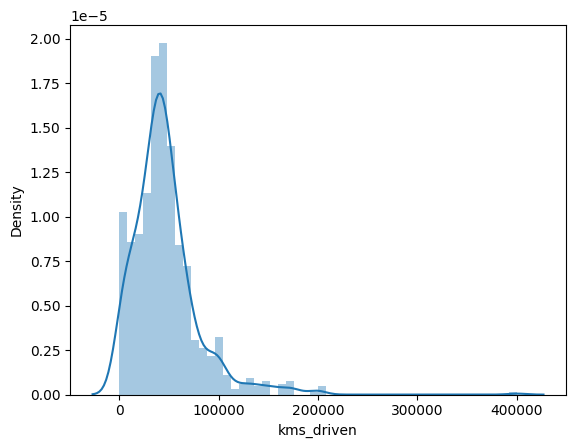

In [175]:
sns.distplot(X['kms_driven'])
# right skewed

In [15]:
from sklearn.preprocessing import PowerTransformer, FunctionTransformer

In [16]:
def square_transform(x):
    return np.square(x)

# Function for log transformation (note: avoid log(0) issues)
def log_transform(x):
    return np.log1p(x)

In [17]:
## check with standardization

column_trans = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(handle_unknown='ignore'), ['name', 'company', 'fuel_type']),
    ('year-sq', FunctionTransformer(square_transform), ['year']),
    ('kms-log', FunctionTransformer(log_transform), ['kms_driven'])
], remainder='passthrough')

In [205]:
X_train['kms_driven'].unique()

array([ 38600, 100000,  23000,  55000,  20000,  50000,  48000,  65000,
        44000, 170000,  65422,  35000, 200000,  30874,  28000,  60000,
        80000,  40000,  30000, 130000, 160000,  90000,  52000,   7000,
        97200,  27000, 116000,   1500,  12516,  76000,  60500,  36200,
        38200,   2110,    122,  45872,  54000,  29000,  41000,  13000,
            0,  51000,  59000,   3600,  39000,  42000,  35522, 137495,
         2200,  45000,  72000,  18000,  99000,  49000,  36000,  22000,
        53000,  24530,  63000,  11000,  47000,  38000,  43222,  46000,
           60,  15000,     73,  15487,    383,  31000,  19000,  72160,
        43000,  25000,  32000,  95000,  37000,  56400,  75000,   6821,
        37458,   9800,  11400,   9300, 117000,  85455, 111111,  34000,
        45863,  33000,   6000,  48660,  68485, 140000, 175430,  33400,
        48008,  16934,  59466,  59910,   1000,  68000,  10544,  64000,
         2450,   3200,  11523,  62000,   9000,   3350,  38500, 120000,
      

In [18]:
lr3 = LinearRegression()

pipe3 = make_pipeline(column_trans, lr3)
pipe3.fit(X_train, y_train)
y_pred3 = pipe3.predict(X_test)
r2_score(y_test, y_pred3)

0.6263288186553696

In [26]:
## cross val score

from sklearn.model_selection import cross_val_score

cv_scores = np.mean(cross_val_score(pipe3, X, y, cv=5))
cv_scores

0.6110639109659421

In [27]:
import pickle

In [28]:
pickle.dump(pipe3, open('/content/drive/MyDrive/Machine Learning/LinearRegressionQuickr.pkl', 'wb'))

In [31]:
X.head()

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel


In [32]:
pipe3.predict(pd.DataFrame([['Maruti Suzuki Swift', 'Maruti', 2019, 100, 'Petrol']], columns=['name', 'company', 'year', 'kms_driven', 'fuel_type']))

array([607046.23300413])